In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [6]:
parent_dir = os.path.dirname(os.getcwd())
file = os.path.join(parent_dir, 'Analysis_Performance.xlsx')
evaluation_data = pd.read_excel(file)
evaluation_data.head()

,test,Rounds_played,guesses_red_correct,guesses_red_incorrect_black,guesses_red_incorrect_neutral,guesses_red_incorrect_opponent,guesses_red_incorrect_invalid,guesses_blue_correct,guesses_blue_incorrect_black,guesses_blue_incorrect_neutral,guesses_blue_incorrect_opponent,guesses_blue_incorrect_invalid,winner,majority,precision_red,precision_blue
0,baseline,10.090909,6.090909,0.090909,1.636364,1.545455,0.090909,5.090909,0.272727,1.181818,1.363636,0.090909,BLUE,54.545455,0.644231,0.636364
1,riskavoiding,11.363636,5.545455,0.090909,0.818182,0.545455,0.000000,5.727273,0.454545,1.636364,1.363636,0.090909,RED,63.636364,0.792208,0.617647
2,balanced,8.818182,5.818182,0.181818,1.090909,1.090909,0.090909,4.545455,0.181818,1.090909,1.272727,0.000000,BLUE,54.545455,0.703297,0.641026
3,male,8.454545,5.727273,0.181818,1.000000,1.272727,0.181818,4.363636,0.181818,1.454545,0.636364,0.000000,BLUE,63.636364,0.684783,0.657534
4,riskaffine,8.727273,6.000000,0.272727,1.363636,0.727273,0.181818,4.636364,0.090909,1.181818,1.000000,0.090909,BLUE,54.545455,0.702128,0.662338


### For the evaluation, we ran 10 games per game setting. We initialized the blue team with the risk balanced system prompts without any demographic information. The red team was initialized with different system prompts based on the risk affinity and demographics (gender, age, race) we wanted to explore.  


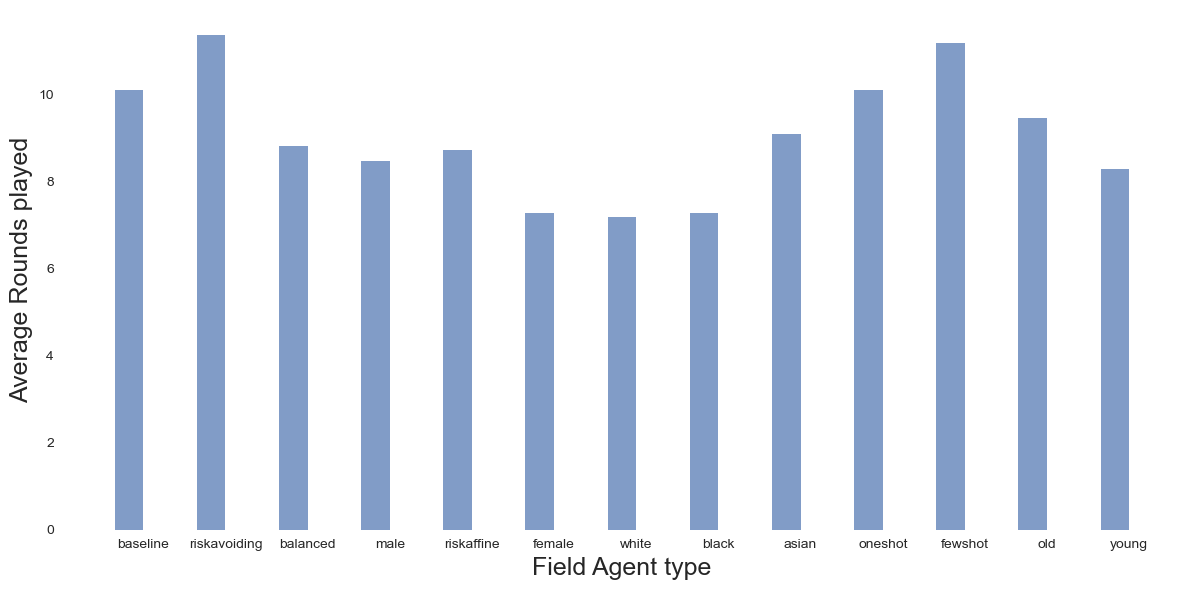

In [13]:
plt.figure(figsize=(12,6),facecolor='white')
plt.style.use('seaborn')
# bars

rounds = evaluation_data['Rounds_played']
ax = plt.gca()
ax.set_facecolor('white')
bar_width = 0.35
x = range(len(evaluation_data))

plt.bar([i - bar_width/2 for i in x], evaluation_data['Rounds_played'], bar_width,
        label='Average Rounds played', alpha=0.7)

plt.xlabel('Field Agent type', fontsize=18)
plt.ylabel('Average Rounds played', fontsize = 18)

plt.xticks(x, evaluation_data['test'])

plt.tight_layout()

plt.show()
